# Using pytorch to predict a function

First, we used the code from the page of pytorch, "Pytorch:Tensors and Autograd" from https://pytorch.org/tutorials/beginner/examples_autograd/polynomial_autograd.html

99 855.5100708007812
199 580.06640625
299 394.6044616699219
399 269.6147155761719
499 185.30001831054688
599 128.36874389648438
699 89.8890380859375
799 63.854251861572266
899 46.22124481201172
999 34.26593017578125
1099 26.15138053894043
1199 20.637596130371094
1299 16.88687515258789
1399 14.332635879516602
1499 12.5911865234375
1599 11.402555465698242
1699 10.590326309204102
1799 10.034651756286621
1899 9.654048919677734
1999 9.393083572387695
Result: y = 0.019617948681116104 + 0.8419213891029358 x + -0.003384425537660718 x^2 + -0.09122244268655777 x^3


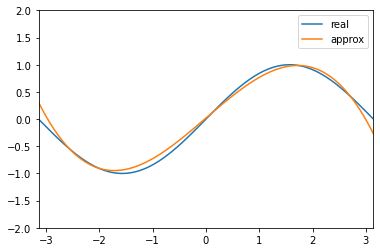

In [13]:
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)


#y=a + bx+cx^2 + dx^3

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
   # z_pred=y_pred**2
    #w_pred=terch.log(z_pred)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

    a1 = a.detach().cpu().numpy()
    b1 = b.detach().cpu().numpy()
    c1 = c.detach().cpu().numpy()
    d1 = d.detach().cpu().numpy()
    x1 = x.detach().cpu().numpy()
    y1 = y.detach().cpu().numpy()
    
   # a1=a.data

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

plt.plot(x1,y1, label="real")
plt.plot(x1, a1 + b1*x1 + c1*x1**3 + d1*x1**3, label="approx")
plt.legend()
plt.xlim([-math.pi, math.pi])
plt.ylim([-2,2])
plt.show()

Usign the last code, we make some modifications to have an animation of the original function and each iteration from the approximation function

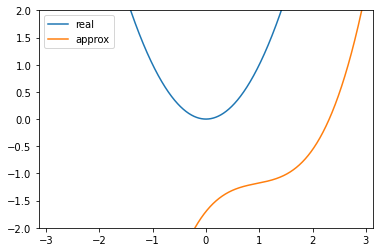

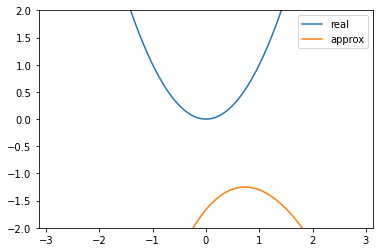

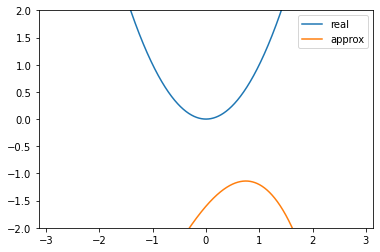

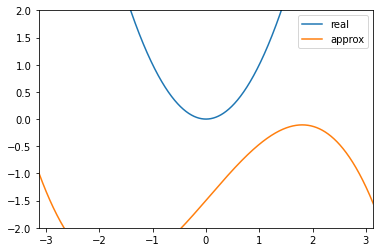

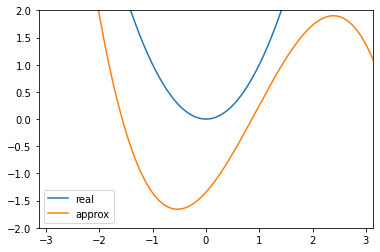

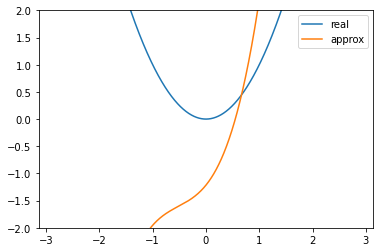

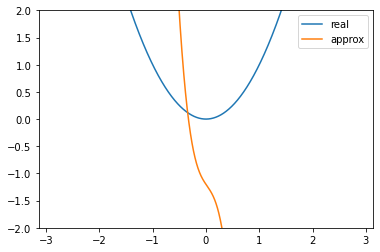

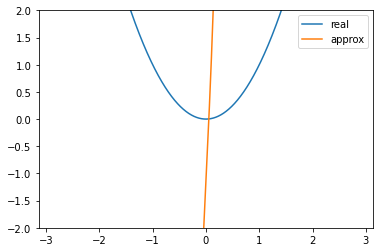

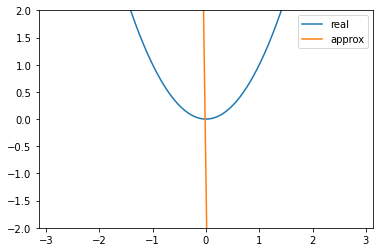

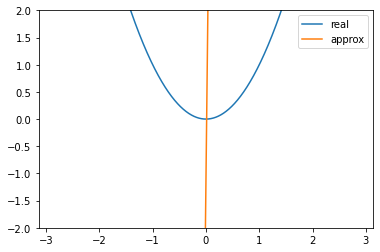

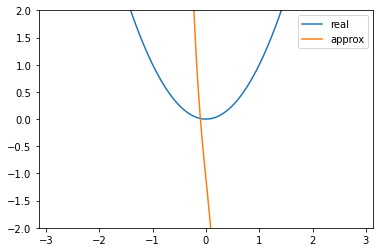

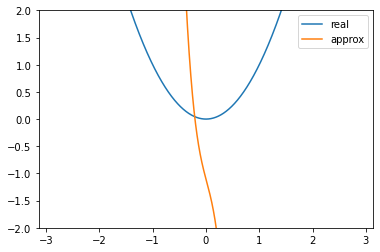

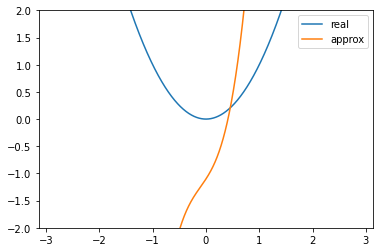

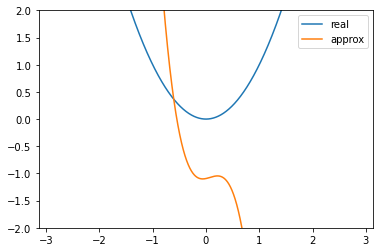

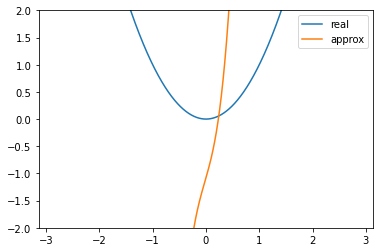

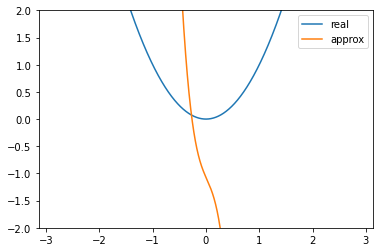

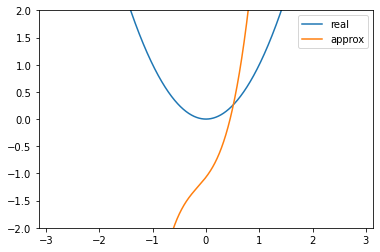

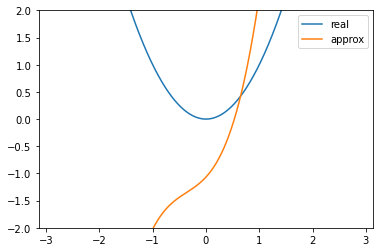

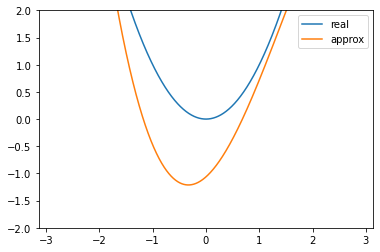

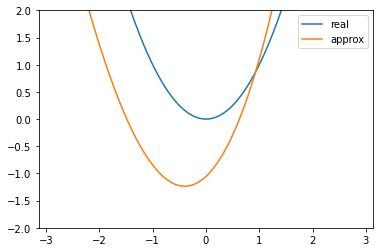

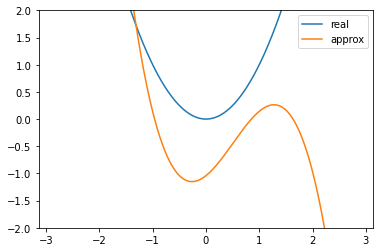

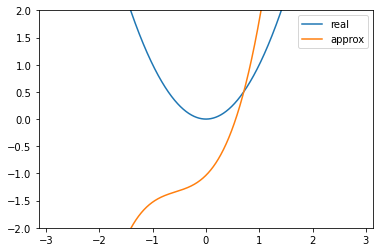

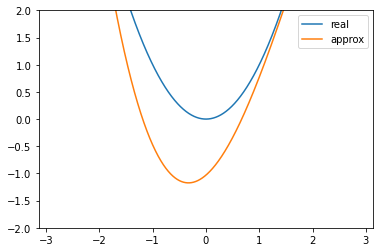

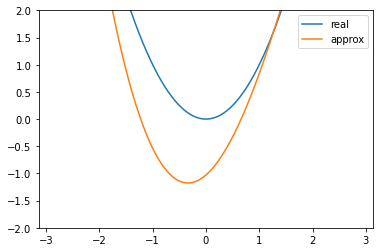

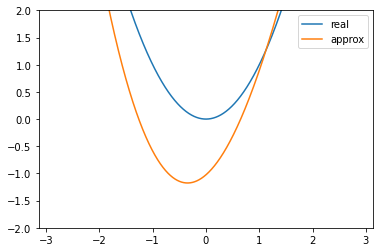

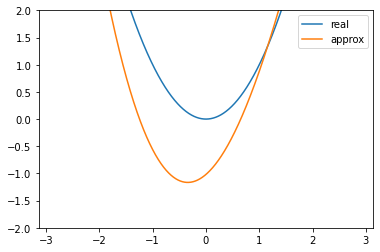

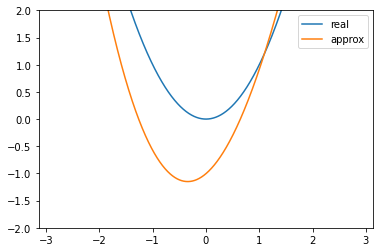

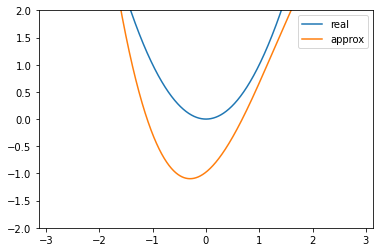

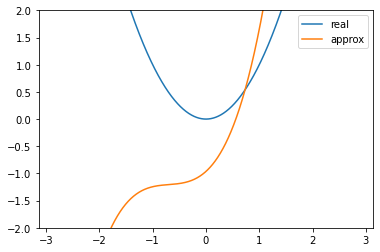

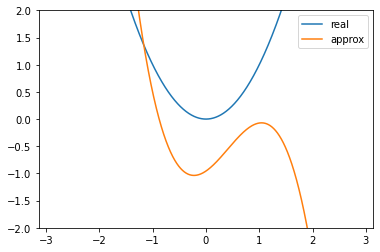

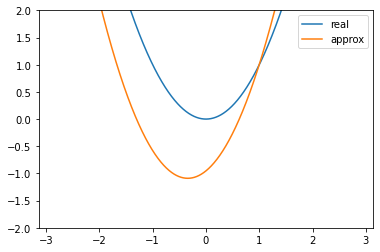

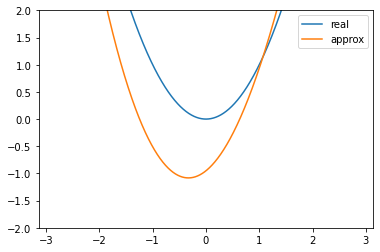

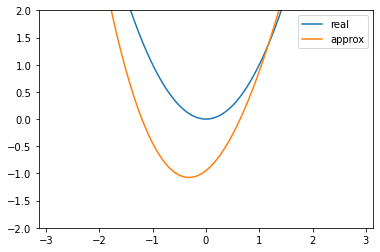

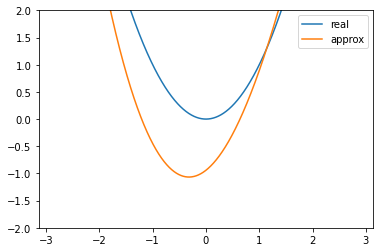

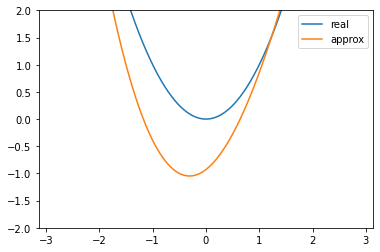

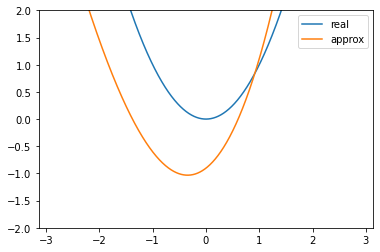

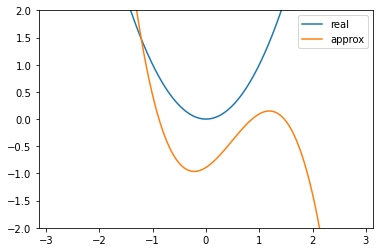

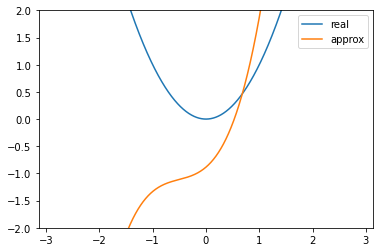

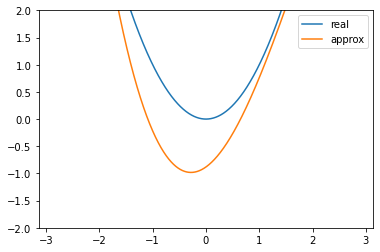

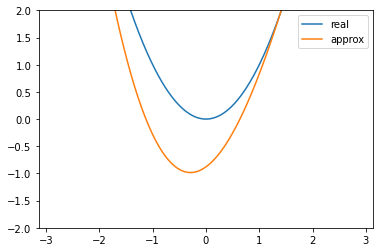

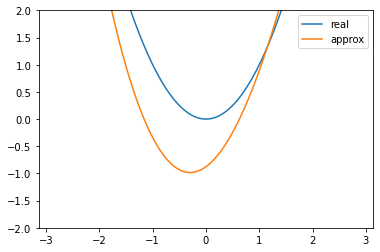

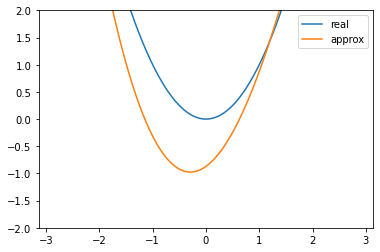

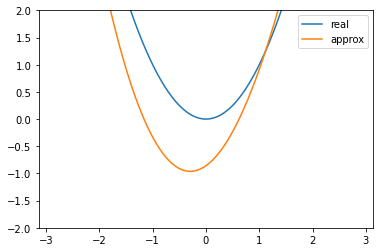

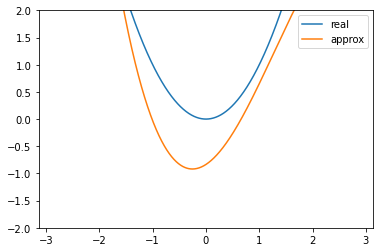

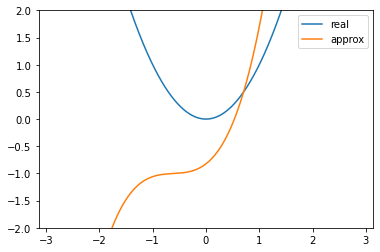

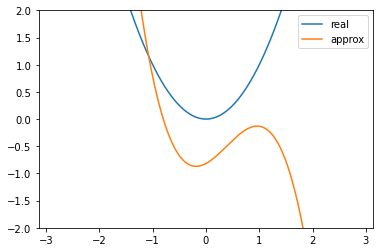

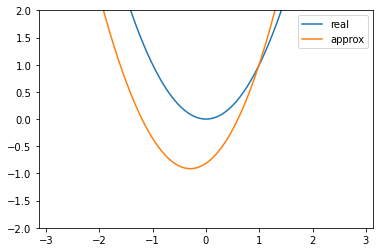

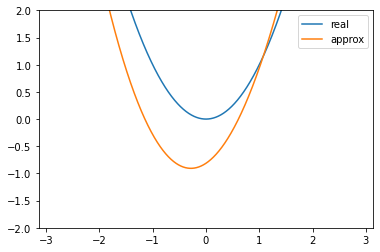

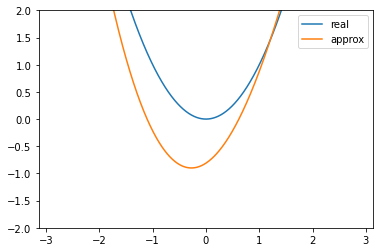

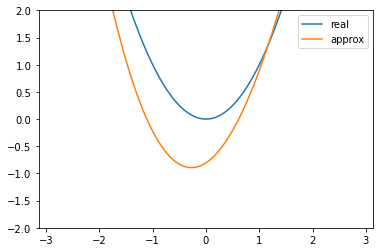

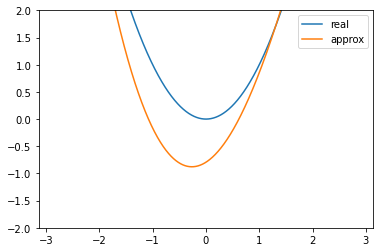

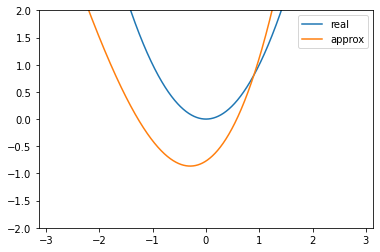

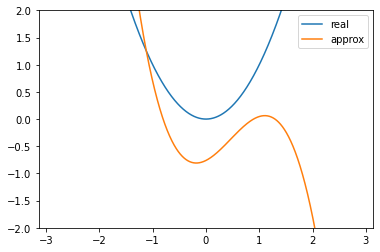

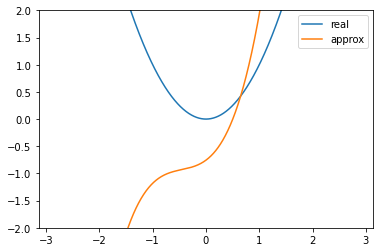

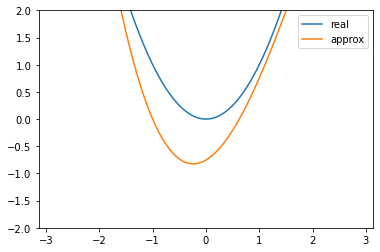

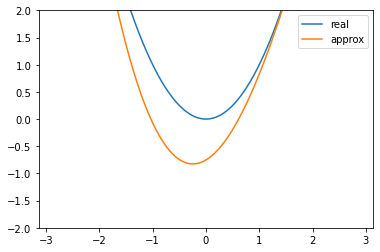

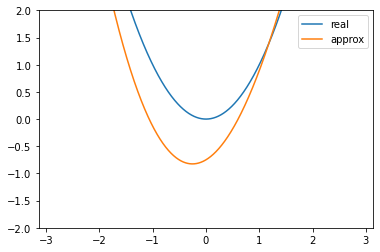

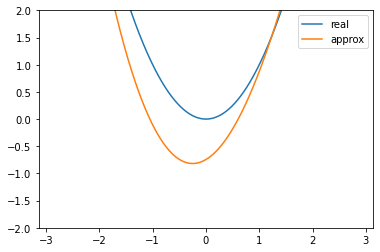

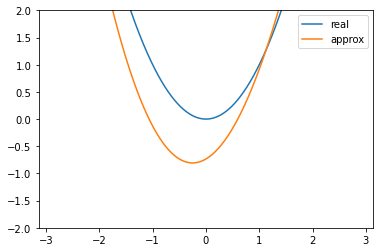

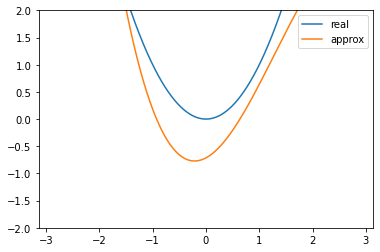

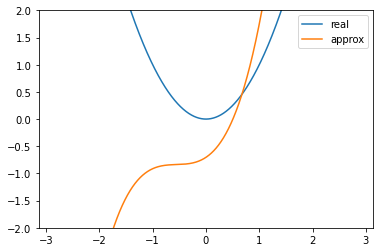

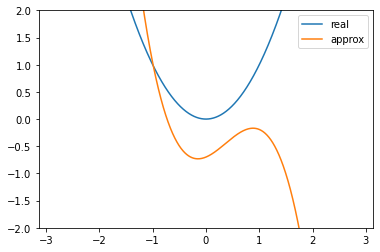

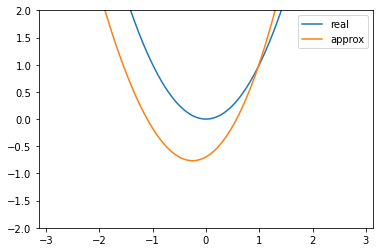

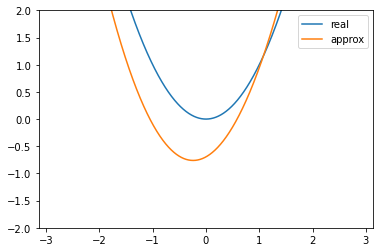

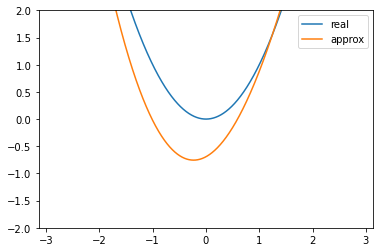

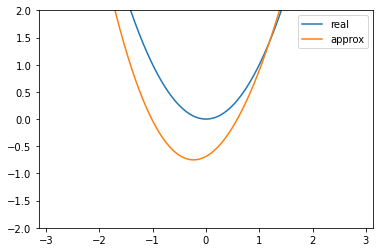

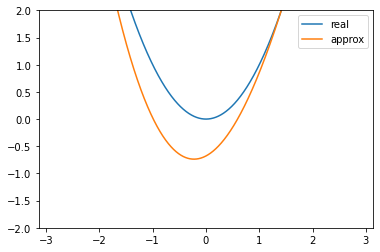

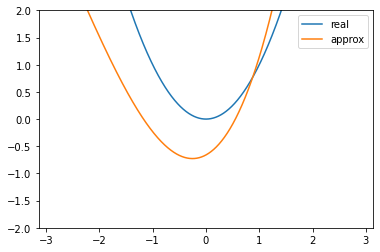

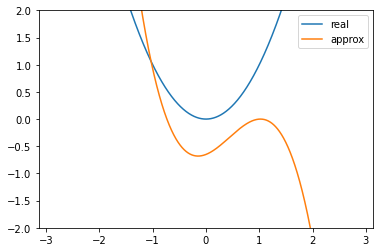

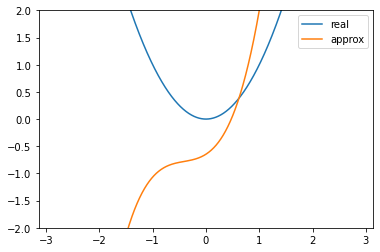

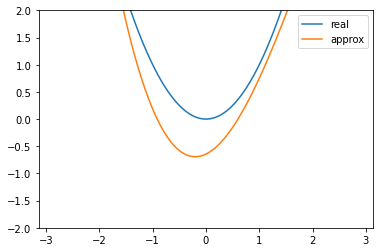

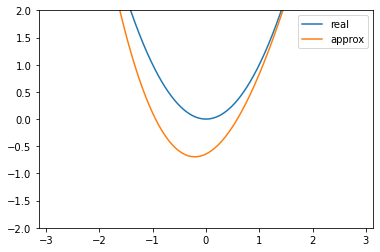

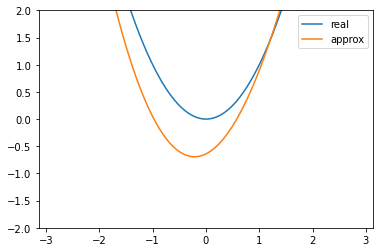

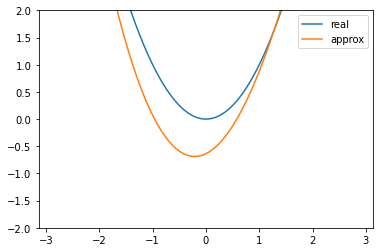

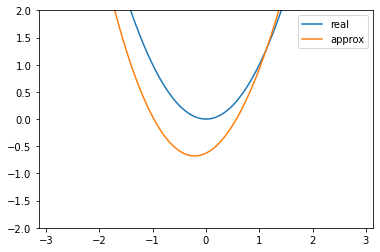

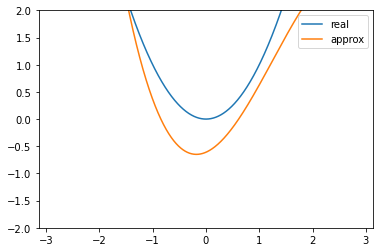

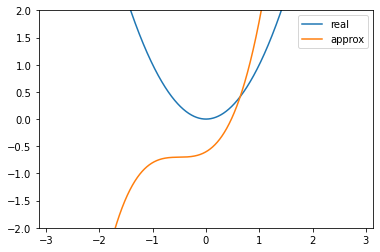

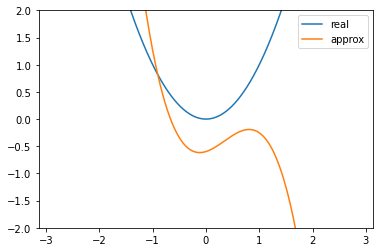

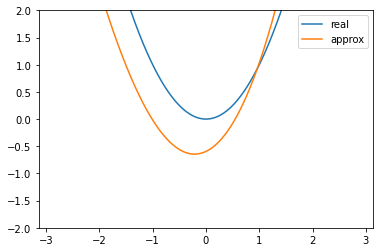

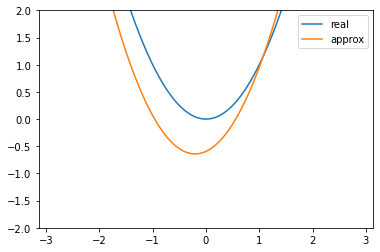

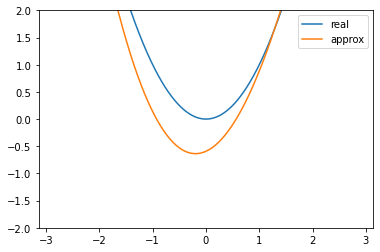

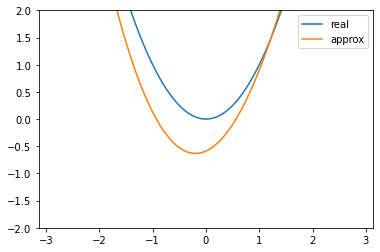

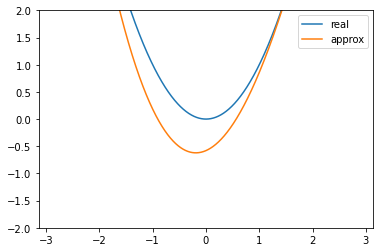

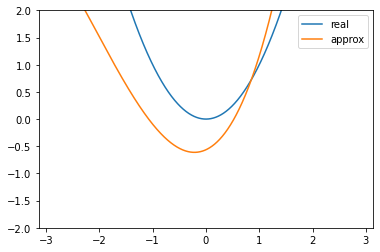

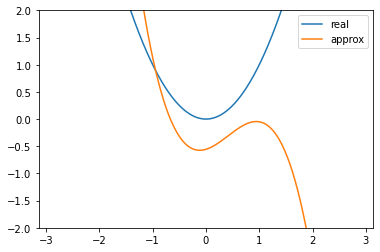

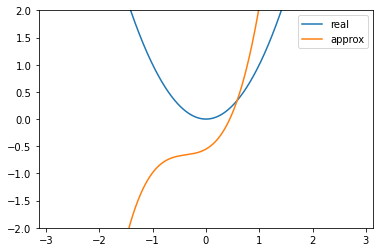

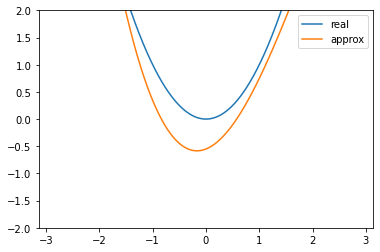

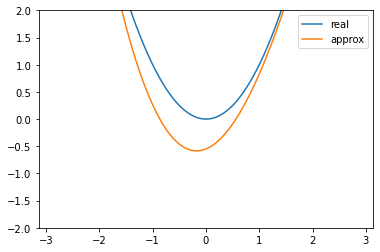

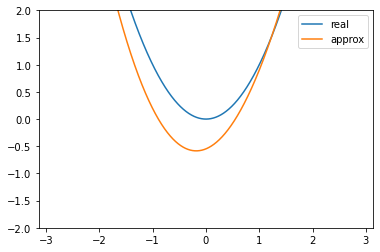

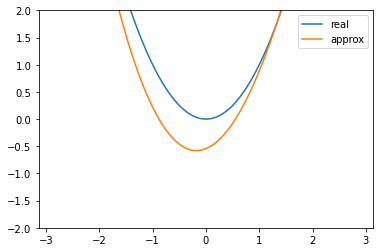

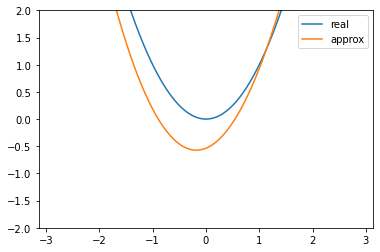

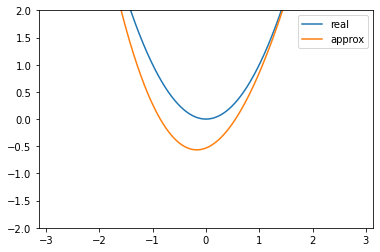

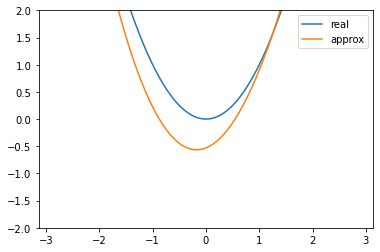

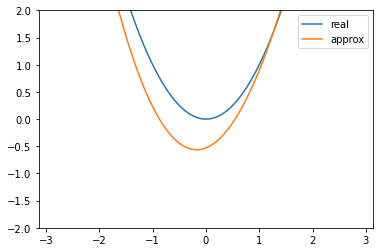

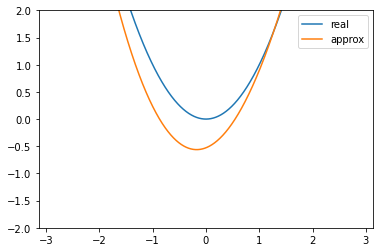

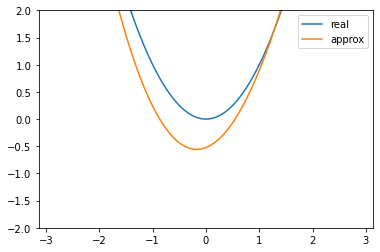

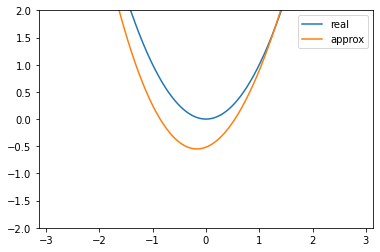

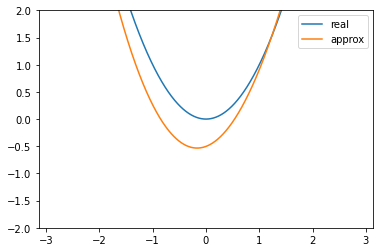

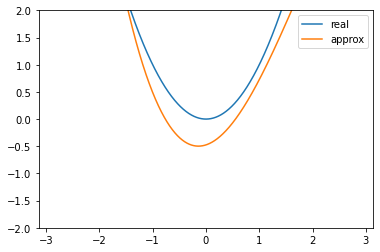

99 6957.8828125


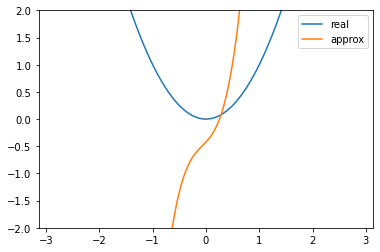

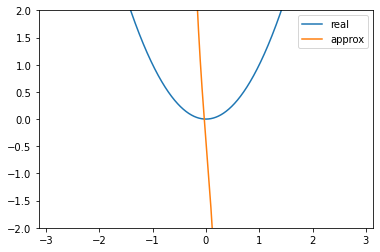

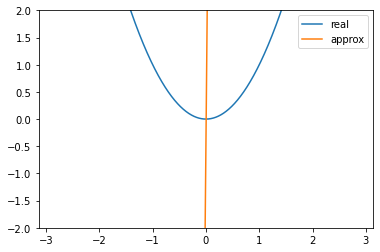

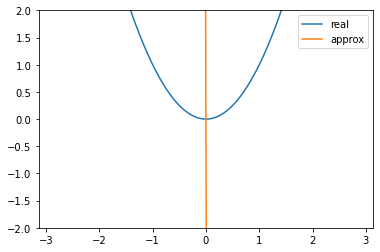

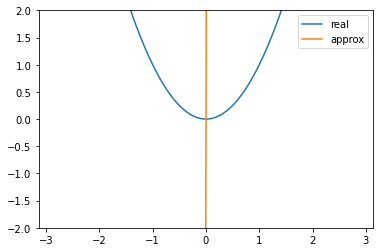

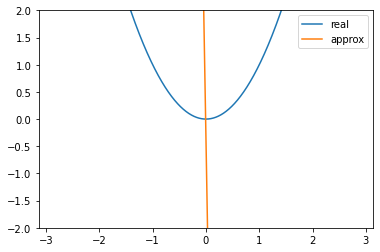

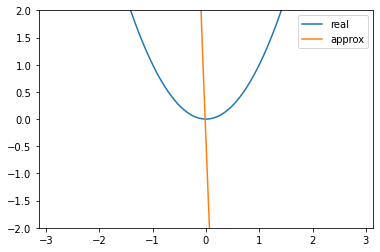

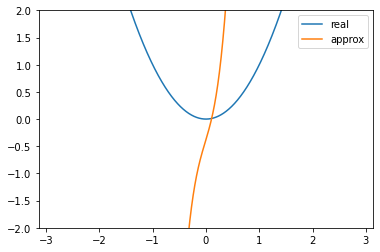

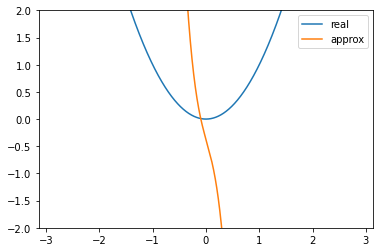

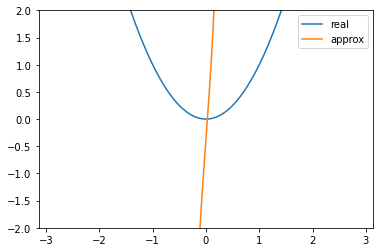

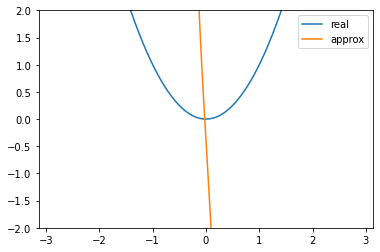

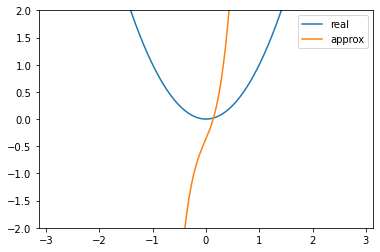

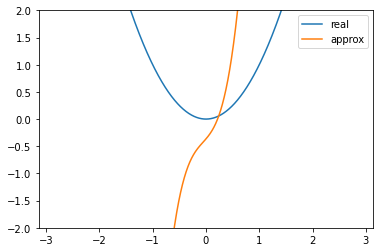

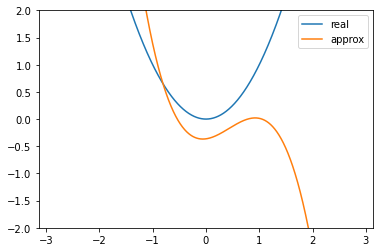

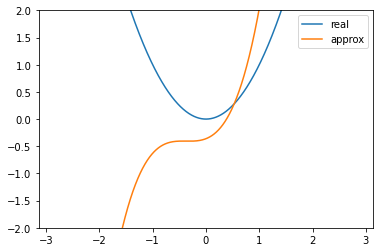

KeyboardInterrupt: 

In [1]:
#copy this code to an .py file
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cpu")
#device = torch.device("cuda")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)

y = x**2
#y = torch.cos(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)


#d = torch.tensor(1e-20, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
loss_old = None
for t in range(20000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None


    if loss_old is not None:
        if loss.item() < loss_old:
            learning_rate = learning_rate * 2
        else:
            learning_rate = learning_rate / 2
    loss_old = loss.item()

    # Plot each iteration
    a1 = a.detach().cpu().numpy()
    b1 = b.detach().cpu().numpy()
    c1 = c.detach().cpu().numpy()
    d1 = d.detach().cpu().numpy()
    x1 = x.detach().cpu().numpy()
    y1 = y.detach().cpu().numpy()

    plt.ion()
    plt.clf()
    plt.plot(x1,y1, label="real")
    plt.plot(x1, a1 + b1*x1 + c1*x1**2 + d1*x1**3, label="approx")
    plt.legend()
    plt.xlim([-math.pi,math.pi])
    plt.ylim([-2,2])
    plt.pause(1e-18)


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

plt.figure()
# Plot each iteration
a1 = a.detach().cpu().numpy()
b1 = b.detach().cpu().numpy()
c1 = c.detach().cpu().numpy()
d1 = d.detach().cpu().numpy()
x1 = x.detach().cpu().numpy()
y1 = y.detach().cpu().numpy()

plt.plot(x1,y1, label="real")
plt.plot(x1, a1 + b1*x1 + c1*x1**3 + d1*x1**3, label="approx")
plt.legend()
plt.xlim([-math.pi, math.pi])
plt.ylim([-2,2])
plt.show()

## Using both codes in an exponential function

Using the first code and changing the funtion sin for an exponential function, we obtain a distant approximation of the exponential function and we have better results in the approximation of sin function

99 989.4642333984375
199 838.5187377929688
299 734.4539794921875
399 662.631103515625
499 613.0078125
599 578.6869506835938
699 554.9254760742188
799 538.458251953125
899 527.034912109375
999 519.1034545898438
1099 513.591064453125
1199 509.7568359375
1299 507.08740234375
1399 505.2274169921875
1499 503.93048095703125
1599 503.025390625
1699 502.393310546875
1799 501.95147705078125
1899 501.642578125
1999 501.4263916015625
Result: y = 0.5222421288490295 + 0.7473242878913879 x + 0.9618058204650879 x^2 + 0.28037458658218384 x^3


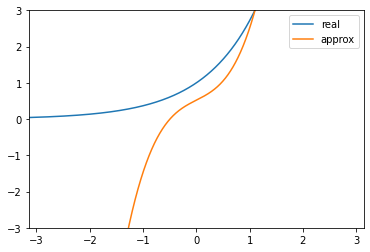

In [14]:
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.exp(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)


#y=a + bx+cx^2 + dx^3

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
   # z_pred=y_pred**2
    #w_pred=terch.log(z_pred)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

    a1 = a.detach().cpu().numpy()
    b1 = b.detach().cpu().numpy()
    c1 = c.detach().cpu().numpy()
    d1 = d.detach().cpu().numpy()
    x1 = x.detach().cpu().numpy()
    y1 = y.detach().cpu().numpy()

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

plt.plot(x1,y1, label="real")
plt.plot(x1, a1 + b1*x1 + c1*x1**3 + d1*x1**3, label="approx")
plt.legend()
plt.xlim([-math.pi, math.pi])
plt.ylim([-3,3])
plt.show()

In the following code we see the approximation and it is fast but it is more complicated to get a better approximation as time passes

In [ ]:
#copy this code to an .py file

import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cpu")
#device = torch.device("cuda")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)

y = torch.exp(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)


#d = torch.tensor(1e-20, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
loss_old = None
for t in range(20000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None


    if loss_old is not None:
        if loss.item() < loss_old:
            learning_rate = learning_rate * 2
        else:
            learning_rate = learning_rate / 2
    loss_old = loss.item()

    # Plot each iteration
    a1 = a.detach().cpu().numpy()
    b1 = b.detach().cpu().numpy()
    c1 = c.detach().cpu().numpy()
    d1 = d.detach().cpu().numpy()
    x1 = x.detach().cpu().numpy()
    y1 = y.detach().cpu().numpy()

    plt.ion()
    plt.clf()
    plt.plot(x1,y1, label="real")
    plt.plot(x1, a1 + b1*x1 + c1*x1**2 + d1*x1**3, label="approx")
    plt.legend()
    plt.xlim([-math.pi,math.pi])
    plt.ylim([-2,2])
    plt.pause(1e-18)


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

plt.figure()
# Plot each iteration
a1 = a.detach().cpu().numpy()
b1 = b.detach().cpu().numpy()
c1 = c.detach().cpu().numpy()
d1 = d.detach().cpu().numpy()
x1 = x.detach().cpu().numpy()
y1 = y.detach().cpu().numpy()

plt.plot(x1,y1, label="real")
plt.plot(x1, a1 + b1*x1 + c1*x1**3 + d1*x1**3, label="approx")
plt.legend()
plt.xlim([-math.pi, math.pi])
plt.ylim([-2,2])
plt.show()

## Changing the 3th grade for 4th grade function for the prediction (y_pred)
It´s necessary change the learning_rate to 1e-7 for the code work; and we obtain a faster and better approximation with the 3th grade function with the next code

99 5164.7392578125
199 4446.17236328125
299 3832.384765625
399 3307.6435546875
499 2858.933837890625
599 2475.14697265625
699 2146.79541015625
799 1865.7841796875
899 1625.20166015625
999 1419.14599609375
1099 1242.5823974609375
1199 1091.209228515625
1299 961.35546875
1399 849.8878173828125
1499 754.1281127929688
1599 671.794677734375
1699 600.9356689453125
1799 539.8856201171875
1899 487.2217712402344
1999 441.7310791015625
Result: y = 0.6381471753120422 + 0.6762784123420715 x + -0.07287254184484482 x^2 + -0.06766117364168167 x^3 + -0.002335174009203911 x^4


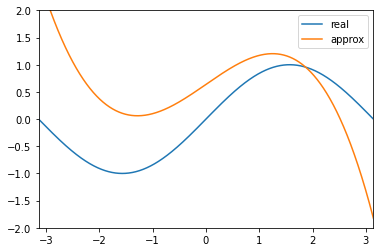

In [40]:
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)
h = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-7
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3 + h * x ** 4

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        h -= learning_rate * h.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
        h.grad = None

    a1 = a.detach().cpu().numpy()
    b1 = b.detach().cpu().numpy()
    c1 = c.detach().cpu().numpy()
    d1 = d.detach().cpu().numpy()
    h1 = h.detach().cpu().numpy()
    x1 = x.detach().cpu().numpy()
    y1 = y.detach().cpu().numpy()

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3 + {h.item()} x^4')

plt.plot(x1,y1, label="real")
plt.plot(x1, a1 + b1*x1 + c1*x1**3 + d1*x1**3 + h1*x1**4 , label="approx")
plt.legend()
plt.xlim([-math.pi, math.pi])
plt.ylim([-2,2])
plt.show()

It´s necessary change the learning_rate to 1e-7 for the code work if we use the code without store the loss.item() for each iteration; but if we store the loss.item() for each iteration we can conserve the learning_rate at 1e-6.

If we store the loss.item(), we obtain better results than the 3th grade function; with the 4th grade function the approximation is faster and better in each iteration

In [ ]:
#copy this code to an .py file

import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)
h = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
loss_old = None
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3 + h * x ** 4

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        h -= learning_rate * h.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
        h.grad = None

    if loss_old is not None:
        if loss.item() < loss_old:
            learning_rate = learning_rate * 2
        else:
            learning_rate = learning_rate / 2
    loss_old = loss.item()

    #Plot each iteration
    a1 = a.detach().cpu().numpy()
    b1 = b.detach().cpu().numpy()
    c1 = c.detach().cpu().numpy()
    d1 = d.detach().cpu().numpy()
    h1 = h.detach().cpu().numpy()
    x1 = x.detach().cpu().numpy()
    y1 = y.detach().cpu().numpy()

    plt.ion()
    plt.clf()
    plt.plot(x1,y1, label="real")
    plt.plot(x1, a1 + b1*x1 + c1*x1**3 + d1*x1**3 + h1*x1**4 , label="approx")
    plt.legend()
    plt.xlim([-math.pi,math.pi])
    plt.ylim([-2,2])
    plt.pause(1e-18)

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3 + {h.item()} x^4')

plt.plot(x1,y1, label="real")
plt.plot(x1, a1 + b1*x1 + c1*x1**3 + d1*x1**3 + h1*x1**4 , label="approx")
plt.legend()
plt.xlim([-math.pi, math.pi])
plt.ylim([-2,2])
plt.show()

## If we store loss.item () for each iteration, we have faster results, but the graphic it goes crazy for moments